c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


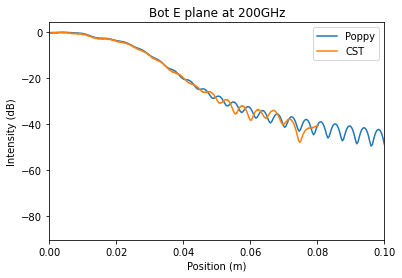

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

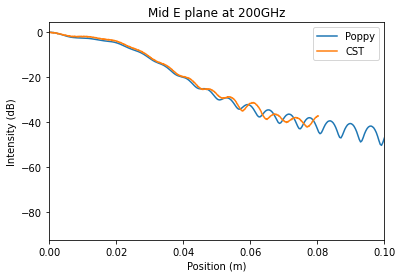

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

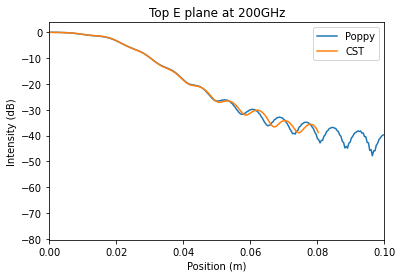

<Figure size 432x288 with 0 Axes>

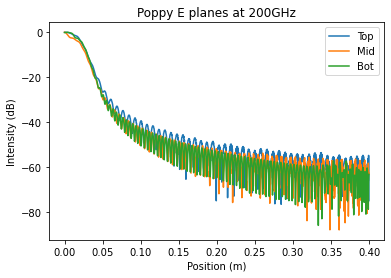

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

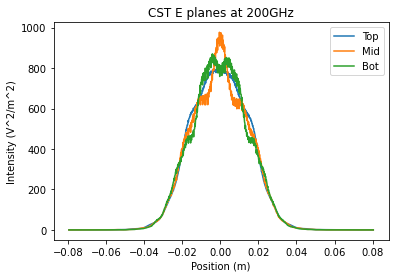

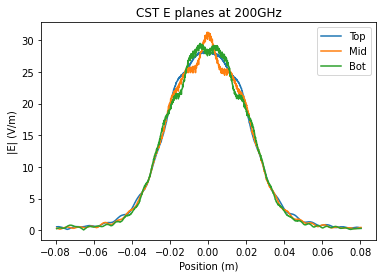

In [1]:
# From lens to tertiary in poppy @ 200GHz
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

rnum=str(9) # what run number should be plotted?
# original=4, high NFS res=5, high CST mesh res=6, guassian drops off too slowly on these
# best=7
# test off axis lenslet phase correction=9

ylens=-49.840796
ybot=-27.8737
ymid=-18.8737
ytop=-9.8737
# separations 
d = [(ybot-ylens)*u.cm,(ymid-ybot)*u.cm,(ytop-ymid)*u.cm]

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 200 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]

ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=20*u.cm, wavelength=ll)
    
lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.0381*u.m)
wf *= ring # cold stop

wf.propagate_fresnel(d[0]) # propogate to bot
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
y, x = wf.coordinates()
plt.figure(1)
plt.title("Bot E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_bot=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_botx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_botx, pop_bot,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
#plt.savefig("Bot_comparison.png")
plt.show()
plt.clf()

wf.propagate_fresnel(d[1]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
plt.figure(2)
plt.title("Mid E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_mid=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_midx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_midx, pop_mid,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
#plt.savefig("Mid_comparison.png")
plt.show()
plt.clf()

wf.propagate_fresnel(d[2]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
plt.figure(3)
plt.title("Top E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_top=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_topx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_topx, pop_top,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
#plt.savefig("Top_comparison.png")
plt.show()
plt.clf()

plt.figure(4)                    
plt.title("Poppy E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
plt.plot(pop_topx,pop_top,label='Top')
plt.plot(pop_midx,pop_mid,label='Mid')
plt.plot(pop_botx,pop_bot,label='Bot')                    
plt.legend()
#plt.savefig("Poppy_Eplanes_dB.png")
plt.show()
plt.clf()
                    
plt.figure(5)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Top')
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Mid')                
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Bot')                  
plt.legend()  
plt.xlim([0,0.1])
#plt.savefig("CST_Eplanes_dB.png")
#plt.show()                    
plt.clf()


plt.figure(6)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (V^2/m^2)")
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
plt.plot(xpos[0:994]/100,xpower[0:994],label='Top')
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
plt.plot(xpos[0:994]/100,xpower[0:994],label='Mid')                 
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
plt.plot(xpos[0:994]/100,xpower[0:994],label='Bot')                  
plt.legend()  
#plt.xlim([0,0.1])
#plt.savefig("CST_Eplanes_power.png")
plt.show()  

plt.figure(7)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("|E| (V/m)")
xE=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
plt.plot(xpos[0:994]/100,xE[0:994],label='Top')
xE=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
plt.plot(xpos[0:994]/100,xE[0:994],label='Mid')                 
xE=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
plt.plot(xpos[0:994]/100,xE[0:994],label='Bot')                  
plt.legend()  
#plt.xlim([0,0.1])
#plt.savefig("CST_Eplanes_E.png")
plt.show() 

                    

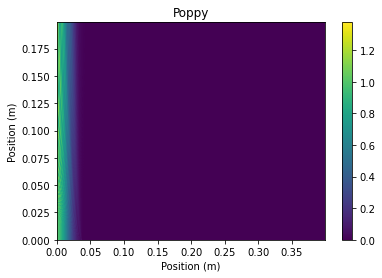

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 200 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]

ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=20*u.cm, wavelength=ll)
    
lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.0381*u.m)
wf *= ring # cold stop

n=200
d=0.001*u.m
Eplane=np.zeros((n,1024))
for it in range(0,n):
    wf.propagate_fresnel(d) 
    Eplane[it,:]=wf.intensity[wf.intensity.shape[1]//2,1024:]
   

y, x = wf.coordinates()
plt.pcolormesh(np.arange(0,1024)*(np.max(y)/1024),range(0,n)*d.value,Eplane)
plt.colorbar()
plt.title('Poppy')
#plt.xlim([-0.15, 0.15])
#plt.ylim([-0.15, 0.15])
plt.xlabel('Position (m)')
plt.ylabel('Position (m)')
plt.show()
    

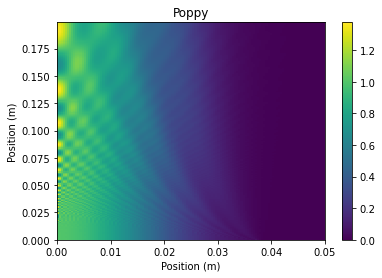

In [13]:
plt.pcolormesh(np.arange(0,1024)*(np.max(y)/1024),range(0,n)*d.value,Eplane)
plt.colorbar()
plt.title('Poppy')
plt.xlim([0, 0.05])
#plt.ylim([-0.15, 0.15])
plt.xlabel('Position (m)')
plt.ylabel('Position (m)')
plt.show()